In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)


Mounted at /content/drive


results  Sign-Language	Sports


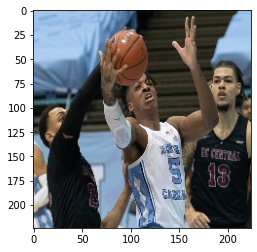

In [ ]:
!ls "/content/drive/My Drive/DataSets/"

from matplotlib.pyplot import imshow
import numpy as np
from PIL import Image

%matplotlib inline
pil_im = Image.open('/content/drive/My Drive/DataSets/Sports/test/basketball/1.jpg', 'r')
imshow(np.asarray(pil_im))



In [ ]:
import tensorflow as tf
tf.test.gpu_device_name()

'/device:GPU:0'

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import RMSprop
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.callbacks import EarlyStopping
from keras import backend as K
import keras
from time import time
from tensorflow.keras.optimizers import Adam


# DATA SOURCE --------------------------------------------------

batch_size = 20

train_data_dir = '/content/drive/My Drive/DataSets/Sports/train'
validation_data_dir = '/content/drive/My Drive/DataSets/Sports/valid'

# DATA AUGMENTATION

train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.3,
    zoom_range=0.3,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_data_dir,
        target_size=(224, 224),
        batch_size=batch_size,
        class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
        validation_data_dir,
        target_size=(224, 224),
        batch_size=batch_size,
        class_mode='categorical')

# MODEL --------------------------------------------------
model = Sequential()
model.add(Conv2D(64, kernel_size=(3,3), activation='relu', input_shape=(224, 224, 3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(256, (3,3), activation='relu')) 
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(256, (3,3), activation='relu')) 
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(512, (3,3), activation='relu')) 
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dropout(0.25))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(512, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(lr=0.0005),
              metrics=['accuracy'])

# TRAINING --------------------------------------------------

epochs = 100

es = EarlyStopping(monitor='val_accuracy', mode='max', verbose=1, patience=7, restore_best_weights=True)

history = model.fit_generator(
        train_generator,
        epochs=epochs, 
        validation_data=validation_generator,
        callbacks=[es]
)
# SAVING --------------------------------------------------

model.save("/content/drive/My Drive/DataSets/results/modelo.h5")


Found 1567 images belonging to 10 classes.
Found 50 images belonging to 10 classes.


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")
/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1915: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/100
79/79 [==============================] - 26s 284ms/step - loss: 2.2957 - accuracy: 0.1144 - val_loss: 2.2179 - val_accuracy: 0.2000
Epoch 2/100
79/79 [==============================] - 20s 259ms/step - loss: 2.1083 - accuracy: 0.2468 - val_loss: 1.7129 - val_accuracy: 0.3800
Epoch 3/100
79/79 [==============================] - 20s 256ms/step - loss: 1.8374 - accuracy: 0.3323 - val_loss: 1.8585 - val_accuracy: 0.3000
Epoch 4/100
79/79 [==============================] - 20s 257ms/step - loss: 1.6332 - accuracy: 0.3989 - val_loss: 1.5378 - val_accuracy: 0.4800
Epoch 5/100
79/79 [==============================] - 20s 256ms/step - loss: 1.5703 - accuracy: 0.4337 - val_loss: 1.7287 - val_accuracy: 0.4400
Epoch 6/100
79/79 [==============================] - 20s 257ms/step - loss: 1.4495 - accuracy: 0.4388 - val_loss: 1.3155 - val_accuracy: 0.5600
Epoch 7/100
79/79 [==============================] - 21s 259ms/step - loss: 1.3200 - accuracy: 0.5122 - val_loss: 1.4198 - val_accuracy:

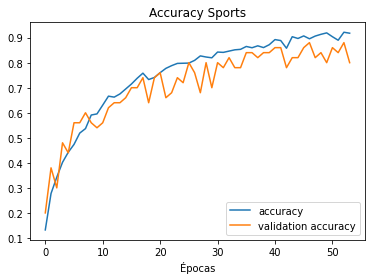

In [ ]:
 from matplotlib import pyplot as plt 

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='validation accuracy')

plt.title('Accuracy Sports')
plt.xlabel('Épocas')
plt.legend(loc="lower right")

plt.show()

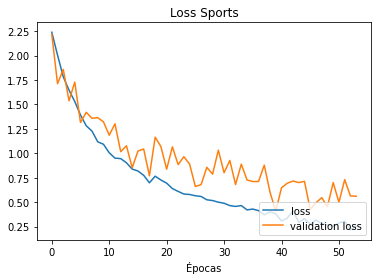

In [ ]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='validation loss')

plt.title('Loss Sports')
plt.xlabel('Épocas')
plt.legend(loc="lower right")

plt.show()

(224, 224, 3)


array([[0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

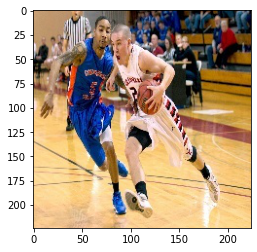

In [ ]:
#Predicción
from matplotlib.pyplot import imshow
import numpy as np
from PIL import Image
import keras

model = keras.models.load_model("/content/drive/My Drive/DataSets/results/modelo.h5")
%matplotlib inline

pil_im = Image.open('/content/drive/My Drive/DataSets/Sports/test/basketball/4.jpg', 'r')
im = np.asarray(pil_im.resize((224, 224)))
imshow(im)
print(im.shape) # La imagen es un array de dimensión: 175x175x3

  # El método predict hace la predicción de un lote de entradas, no solo una. 
  # En el caso de que tengamos solo una entrada deberemos añadirle una dimensión más 
  # al array numpy para que la entrada tenga la dimensión: 1x175x175x3
im = im.reshape(1,224,224,3)
model.predict(im)


(224, 224, 3)


array([[0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

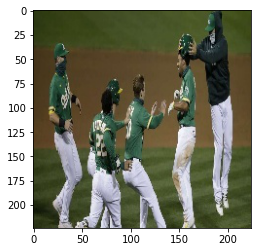

In [ ]:
pil_im = Image.open('/content/drive/My Drive/DataSets/Sports/test/baseball/2.jpg', 'r')
im = np.asarray(pil_im.resize((224, 224)))
imshow(im)
print(im.shape) # La imagen es un array de dimensión: 175x175x3

  # El método predict hace la predicción de un lote de entradas, no solo una. 
  # En el caso de que tengamos solo una entrada deberemos añadirle una dimensión más 
  # al array numpy para que la entrada tenga la dimensión: 1x175x175x3
im = im.reshape(1,224,224,3)
model.predict(im)

(224, 224, 3)


array([[0., 0., 1., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

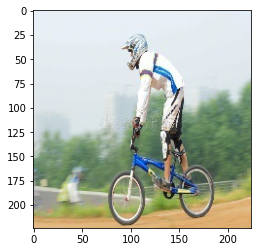

In [ ]:
model = keras.models.load_model("/content/drive/My Drive/DataSets/results/modelo.h5")
%matplotlib inline

pil_im = Image.open('/content/drive/My Drive/DataSets/Sports/test/bmx/1.jpg', 'r')
im = np.asarray(pil_im.resize((224, 224)))
imshow(im)
print(im.shape) # La imagen es un array de dimensión: 175x175x3

  # El método predict hace la predicción de un lote de entradas, no solo una. 
  # En el caso de que tengamos solo una entrada deberemos añadirle una dimensión más 
  # al array numpy para que la entrada tenga la dimensión: 1x175x175x3
im = im.reshape(1,224,224,3)
model.predict(im)

(224, 224, 3)


array([[0., 0., 0., 1., 0., 0., 0., 0., 0., 0.]], dtype=float32)

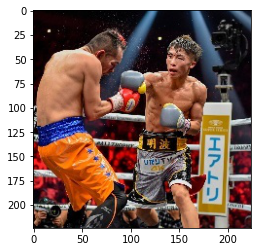

In [ ]:
model = keras.models.load_model("/content/drive/My Drive/DataSets/results/modelo.h5")
%matplotlib inline

pil_im = Image.open('/content/drive/My Drive/DataSets/Sports/test/boxing/5.jpg', 'r')
im = np.asarray(pil_im.resize((224, 224)))
imshow(im)
print(im.shape) # La imagen es un array de dimensión: 175x175x3

  # El método predict hace la predicción de un lote de entradas, no solo una. 
  # En el caso de que tengamos solo una entrada deberemos añadirle una dimensión más 
  # al array numpy para que la entrada tenga la dimensión: 1x175x175x3
im = im.reshape(1,224,224,3)
model.predict(im)

(224, 224, 3)


array([[0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

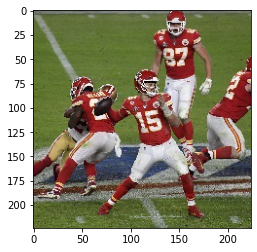

In [ ]:
model = keras.models.load_model("/content/drive/My Drive/DataSets/results/modelo.h5")
%matplotlib inline

pil_im = Image.open('/content/drive/My Drive/DataSets/Sports/test/football/3.jpg', 'r')
im = np.asarray(pil_im.resize((224, 224)))
imshow(im)
print(im.shape) # La imagen es un array de dimensión: 175x175x3

  # El método predict hace la predicción de un lote de entradas, no solo una. 
  # En el caso de que tengamos solo una entrada deberemos añadirle una dimensión más 
  # al array numpy para que la entrada tenga la dimensión: 1x175x175x3
im = im.reshape(1,224,224,3)
model.predict(im)

(224, 224, 3)


array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]], dtype=float32)

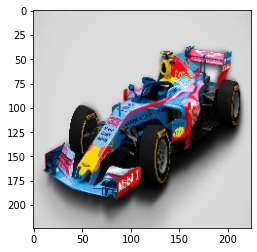

In [ ]:
model = keras.models.load_model("/content/drive/My Drive/DataSets/results/modelo.h5")
%matplotlib inline

pil_im = Image.open("/content/drive/My Drive/DataSets/Sports/test/formula 1 racing/4.jpg", 'r')
im = np.asarray(pil_im.resize((224, 224)))
imshow(im)
print(im.shape) # La imagen es un array de dimensión: 175x175x3

  # El método predict hace la predicción de un lote de entradas, no solo una. 
  # En el caso de que tengamos solo una entrada deberemos añadirle una dimensión más 
  # al array numpy para que la entrada tenga la dimensión: 1x175x175x3
im = im.reshape(1,224,224,3)
model.predict(im)

(224, 224, 3)


array([[0., 0., 0., 0., 0., 0., 1., 0., 0., 0.]], dtype=float32)

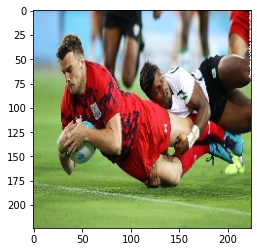

In [ ]:
model = keras.models.load_model("/content/drive/My Drive/DataSets/results/modelo.h5")
%matplotlib inline

pil_im = Image.open('/content/drive/My Drive/DataSets/Sports/test/rugby/5.jpg', 'r')
im = np.asarray(pil_im.resize((224, 224)))
imshow(im)
print(im.shape) # La imagen es un array de dimensión: 175x175x3

  # El método predict hace la predicción de un lote de entradas, no solo una. 
  # En el caso de que tengamos solo una entrada deberemos añadirle una dimensión más 
  # al array numpy para que la entrada tenga la dimensión: 1x175x175x3
im = im.reshape(1,224,224,3)
model.predict(im)

(224, 224, 3)


array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.]], dtype=float32)

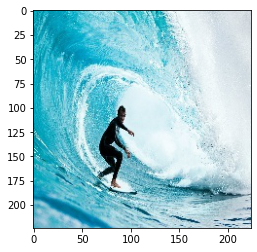

In [ ]:
model = keras.models.load_model("/content/drive/My Drive/DataSets/results/modelo.h5")
%matplotlib inline

pil_im = Image.open('/content/drive/My Drive/DataSets/Sports/test/surfing/1.jpg', 'r')
im = np.asarray(pil_im.resize((224, 224)))
imshow(im)
print(im.shape) # La imagen es un array de dimensión: 175x175x3

  # El método predict hace la predicción de un lote de entradas, no solo una. 
  # En el caso de que tengamos solo una entrada deberemos añadirle una dimensión más 
  # al array numpy para que la entrada tenga la dimensión: 1x175x175x3
im = im.reshape(1,224,224,3)
model.predict(im)

(224, 224, 3)


array([[0., 0., 0., 0., 0., 0., 0., 0., 1., 0.]], dtype=float32)

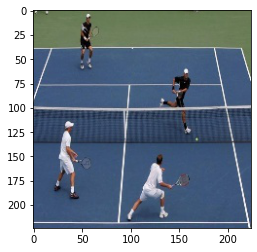

In [ ]:
model = keras.models.load_model("/content/drive/My Drive/DataSets/results/modelo.h5")
%matplotlib inline

pil_im = Image.open('/content/drive/My Drive/DataSets/Sports/test/tennis/3.jpg', 'r')
im = np.asarray(pil_im.resize((224, 224)))
imshow(im)
print(im.shape) # La imagen es un array de dimensión: 175x175x3

  # El método predict hace la predicción de un lote de entradas, no solo una. 
  # En el caso de que tengamos solo una entrada deberemos añadirle una dimensión más 
  # al array numpy para que la entrada tenga la dimensión: 1x175x175x3
im = im.reshape(1,224,224,3)
model.predict(im)

(224, 224, 3)


array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32)

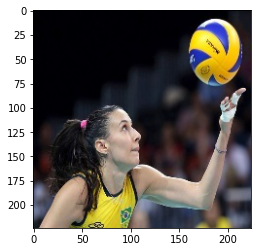

In [ ]:
model = keras.models.load_model("/content/drive/My Drive/DataSets/results/modelo.h5")
%matplotlib inline

pil_im = Image.open('/content/drive/My Drive/DataSets/Sports/test/volleyball/2.jpg', 'r')
im = np.asarray(pil_im.resize((224, 224)))
imshow(im)
print(im.shape) # La imagen es un array de dimensión: 175x175x3

  # El método predict hace la predicción de un lote de entradas, no solo una. 
  # En el caso de que tengamos solo una entrada deberemos añadirle una dimensión más 
  # al array numpy para que la entrada tenga la dimensión: 1x175x175x3
im = im.reshape(1,224,224,3)
model.predict(im)